In [1]:
#The purpose of this file is to test which frequency bands are important to VAD by removing select
#bands during classification and viewing how this affects accuracy
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
import scipy.io.wavfile as sio
import scipy as sp
import matplotlib.pyplot as plt
from utils import vectorize
from utils import vectorize_teensy
import csv
tf.enable_eager_execution()

import numpy as np
import time

In [2]:
#load data and process
rate , audio = sio.read('data/audio/track3.wav')
labels = np.load('data/audio/track3_label.npy')

data, labels = vectorize(audio,rate,1/40,group_size = 3,full = False, training = True, labels = labels, serial = False)
dim = data.shape
data = data.reshape(dim[0],dim[1],1)
print(data.shape)
print(labels.shape)
print(data[1:10])

(212, 24, 1)
(212, 1)
[[[0.00443621]
  [0.00489606]
  [0.00770927]
  [0.01746081]
  [0.01233483]
  [0.01898914]
  [0.01651406]
  [0.02654963]
  [0.00363823]
  [0.00407103]
  [0.00776337]
  [0.01604068]
  [0.00952162]
  [0.01590543]
  [0.01225368]
  [0.03017434]
  [0.00206933]
  [0.00254271]
  [0.00612684]
  [0.01420128]
  [0.0123754 ]
  [0.01755549]
  [0.01664931]
  [0.02829436]]

 [[0.00244803]
  [0.00256976]
  [0.00734409]
  [0.01375495]
  [0.0135115 ]
  [0.01934079]
  [0.01402545]
  [0.03048541]
  [0.0023263 ]
  [0.00269148]
  [0.00797977]
  [0.01927316]
  [0.01612183]
  [0.0241557 ]
  [0.01474228]
  [0.03773483]
  [0.00127135]
  [0.00323248]
  [0.00808797]
  [0.01464761]
  [0.0124295 ]
  [0.02406102]
  [0.01863749]
  [0.02893004]]

 [[0.00186645]
  [0.00247508]
  [0.00551821]
  [0.01274058]
  [0.0122131 ]
  [0.01973302]
  [0.01236188]
  [0.0251295 ]
  [0.00139308]
  [0.00296198]
  [0.00647849]
  [0.01587838]
  [0.0117262 ]
  [0.01959777]
  [0.01907029]
  [0.03573312]
  [0.00358413]

In [3]:
#load up model and check classification accuracy

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM((1), return_sequences = False)
 
])
#compile model
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])
#load weights
model.load_weights('./weights/my_model')


model.evaluate(data,labels)


Instructions for updating:
Colocations handled automatically by placer.
212/212 [==============================] - 0s 382us/sample - loss: 0.2660 - acc: 0.7642


[0.2660079888015423, 0.7641509]

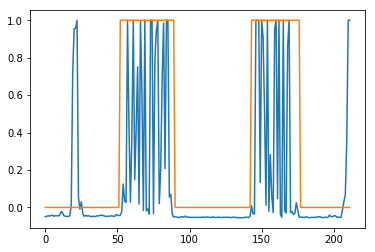

In [4]:
#create 5 modified inputs and run classification on each for accuracy. print out results


prediction = model.predict(data)

#plt.plot(audio)
#plt.show()

plt.plot(prediction)


plt.plot(labels)
plt.show()